Each person will be in charge of:
- Create
- Hyperparameter tuning
- Train 
- Evaluate (with visualization) their model with classification_report, ConfusionMatrixDisplay from sklearn

### Random Forest

Import Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import ParameterGrid

In [2]:
df = pd.read_csv("Group_14_Clean_Data.csv")

df = df.drop(columns=['Unnamed: 0', 'timestamp'])
label_column = 'status'
X = df.drop(label_column, axis=1)
y = df[label_column]

# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (41611, 15) (41611,)
Validation set shape: (8917, 15) (8917,)
Test set shape: (8917, 15) (8917,)


Best Accuracy on Validation Set: 1.00
Best Hyperparameters:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4480
           1       1.00      1.00      1.00      4437

    accuracy                           1.00      8917
   macro avg       1.00      1.00      1.00      8917
weighted avg       1.00      1.00      1.00      8917



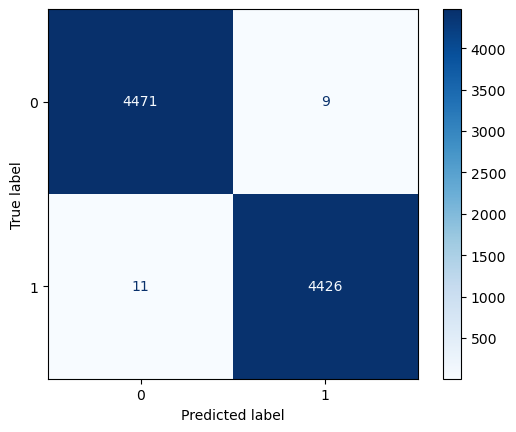

In [4]:
model = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Train the model with the best parameters
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = best_model.predict(X_val)

# Print the performance metric on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Best Accuracy on Validation Set: {accuracy:.2f}')

# Print the best hyperparameters
print('Best Hyperparameters:')
print(best_params)

y_pred_forest = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_forest)

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_forest))
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=best_model.classes_)
disp_forest.plot(cmap='Blues', values_format='d')
plt.show()

Best Hyperparameters:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
OOB Score on Validation Set: 1.00
Best Accuracy on Validation Set: 1.00
Best Hyperparameters:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4480
           1       1.00      1.00      1.00      4437

    accuracy                           1.00      8917
   macro avg       1.00      1.00      1.00      8917
weighted avg       1.00      1.00      1.00      8917



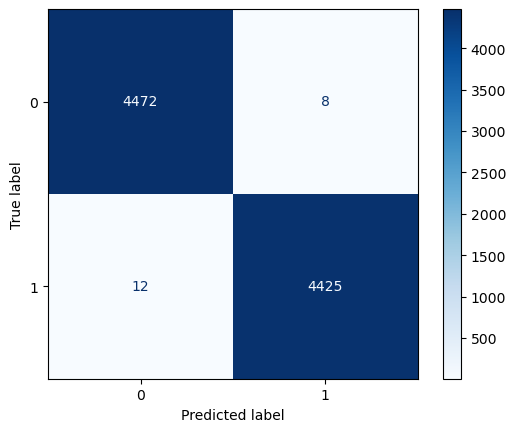

In [6]:
# Specify the hyperparameters to tune and their respective ranges
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a list to store results
results = []

# Iterate over hyperparameter combinations
for params in ParameterGrid(param_grid):
    # Initialize the Random Forest model with OOB score enabled
    rf_model = RandomForestClassifier(oob_score=True, random_state=42, **params)
    
    # Fit the model on the training set
    rf_model.fit(X_train, y_train)
    
    # Get the OOB score on the validation set
    oob_score = rf_model.score(X_val, y_val)
    
    # Store results
    results.append({'params': params, 'oob_score': oob_score})

# Find the best hyperparameters based on the highest OOB score on the validation set
best_params = max(results, key=lambda x: x['oob_score'])['params']

# Print the best hyperparameters and OOB score on the validation set
print('Best Hyperparameters:')
print(best_params)
print(f'OOB Score on Validation Set: {max(results, key=lambda x: x["oob_score"])["oob_score"]:.2f}')

# Train the final model with the best hyperparameters on the entire training set
best_model = RandomForestClassifier(oob_score=True, random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = best_model.predict(X_val)

# Print the performance metric on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Best Accuracy on Validation Set: {accuracy:.2f}')

# Print the best hyperparameters
print('Best Hyperparameters:')
print(best_params)

y_pred_forest = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_forest)

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_forest))
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=best_model.classes_)
disp_forest.plot(cmap='Blues', values_format='d')
plt.show()